# 🎵 Spotify Popular Music Trends Analysis (2000–2022)

# 📌 Introducción

Este proyecto explora **tendencias en la música popular** desde el año 2000 hasta 2022. Utilizando datos extraídos de listas de reproducción de Spotify, buscamos comprender cómo han evolucionado las características musicales, la popularidad por géneros y los atributos de audio a lo largo de más de dos décadas.

### 🔍 Objetivos del análisis:

- ¿Qué géneros han dominado distintas épocas?
- ¿Han cambiado los atributos de audio (como *danceability* o *energy*) con el tiempo?
- ¿Qué relación hay entre la popularidad de un artista y la de sus canciones?

---





# 📅 **Planificación**

# 🛠️ **Herramientas**


# 📂 **Información del Dataset**

**Fuente:** `https://www.kaggle.com/code/akouaorsot/musical-analytics-spotify-2010-2022`  
**Aclaración importante:** Aunque el nombre sugiere que cubre de 2010 a 2022, en realidad incluye datos desde el año **2000**.

### 📄 Estructura del archivo:

- **Formato:** CSV (valores separados por coma)
- **Unidad de análisis:** Cada fila representa una canción incluida en una playlist de un año específico.

### 🧾 Contenido general:

| Categoría                | Variables clave                                                                 |
|--------------------------|----------------------------------------------------------------------------------|
| Identificación y Metadatos | `playlist_url`, `year`, `track_id`, `track_name`, `album`, `artist_id`, `artist_name` |
| Géneros y Popularidad    | `artist_genres`, `track_popularity`, `artist_popularity`                       |
| Atributos de Audio       | `danceability`, `energy`, `acousticness`, `valence`, `tempo`, etc.             |
| Temporalidad             | `duration_ms`, `time_signature`                                                |

---



# 📘 **Diccionario de Datos**

Aquí se detallan las variables del dataset, su tipo de dato y naturaleza estadística:

### 🎶 Identificación de Canciones y Artistas

- **`track_id`**: ID único de la canción (string) — *Categórica Nominal*
- **`track_name`**: Nombre de la canción — *Categórica Nominal*
- **`album`**: Álbum al que pertenece — *Categórica Nominal*
- **`artist_id`**: ID único del artista (string) — *Categórica Nominal*
- **`artist_name`**: Nombre del artista — *Categórica Nominal*
- **`playlist_url`**: URL de la playlist en Spotify — *Categórica Nominal*
- **`year`**: Año de relevancia — *Numérica (Ratio)*, también útil como *Categórica Ordinal*

### 🌐 Género y Popularidad

- **`artist_genres`**: Lista de géneros del artista (ej. `['pop', 'dance pop']`) — *Categórica Nominal (Multietiqueta)*
- **`track_popularity`**: Índice (0–100) de popularidad de la canción — *Numérica (Ordinal o Ratio)*
- **`artist_popularity`**: Popularidad general del artista — *Numérica (Ordinal o Ratio)*

### 🎧 Atributos de Audio

| Variable           | Descripción                                                                          | Tipo de Dato | Tipo de Variable       |
|--------------------|--------------------------------------------------------------------------------------|--------------|-------------------------|
| `danceability`     | Qué tan bailable es una canción (0.0–1.0)                                            | Float        | Numérica (Ratio)        |
| `energy`           | Intensidad y nivel de actividad sonora (0.0–1.0)                                     | Float        | Numérica (Ratio)        |
| `key`              | Tono principal estimado (0 = C, 1 = C♯/D♭, ..., 11 = B)                              | Integer      | Categórica Nominal      |
| `loudness`         | Volumen promedio en decibelios (dB)                                                  | Float        | Numérica (Intervalo)    |
| `mode`             | Modalidad: Mayor (1) o menor (0)                                                     | Integer      | Categórica Binaria      |
| `speechiness`      | Presencia de palabras habladas (0.0–1.0)                                             | Float        | Numérica (Ratio)        |
| `acousticness`     | Confianza de que la canción es acústica (0.0–1.0)                                    | Float        | Numérica (Ratio)        |
| `instrumentalness` | Probabilidad de que no tenga voces (0.0–1.0)                                         | Float        | Numérica (Ratio)        |
| `liveness`         | Probabilidad de que sea una presentación en vivo (0.0–1.0)                           | Float        | Numérica (Ratio)        |
| `valence`          | Qué tan positiva/sentimental se percibe una canción (0.0–1.0)                        | Float        | Numérica (Ratio)        |
| `tempo`            | Tempo estimado en beats por minuto (BPM)                                             | Float        | Numérica (Ratio)        |
| `duration_ms`      | Duración en milisegundos                                                             | Integer      | Numérica (Ratio)        |
| `time_signature`   | Compás musical dominante (ej. 3 = 3/4, 4 = 4/4)                                      | Integer      | Categórica Nominal      |

---

## 🧠 Consideraciones Analíticas

- **Jerarquía:** Existe una estructura natural → *Artista > Álbum > Canción*
- **Contexto vs Contenido:** `year` y `playlist_url` contextualizan la inclusión en la playlist; el resto describe la canción/artista.
- **Popularidad:** La popularidad de artista y canción no siempre se correlacionan directamente.
- **Géneros:** Asignados al artista, lo cual puede no reflejar la variabilidad por canción.
- **Audio Features:** Variables cuantitativas clave para detectar patrones temporales y estilísticos.

---

# 🧪 **Metodología y Análisis del Dataset de Spotify basica para R**

## 2. Metodología y Herramientas

El análisis fue realizado utilizando **R** (versión `[4.3.1]`) y varios paquetes del ecosistema `tidyverse` y otros complementarios.

### 📦 Paquetes utilizados:

| Paquete         | Función principal                                                                                  |
|-----------------|----------------------------------------------------------------------------------------------------|
| `readr`         | Carga eficiente de datos desde `[origen: CSV local / Google Drive]`                                |
| `dplyr`         | Manipulación, limpieza y transformación de datos (filtrado, selección, mutación, agregación)      |
| `tidyr`         | Reestructuración de datos (`separate_rows` en géneros, pivotado)                                   |
| `ggplot2`       | Visualización de datos: histogramas, densidades, scatter plots, boxplots, barras, etc.            |
| `stats` (base)  | Ejecución de algoritmo K-Means (`kmeans`)                                                          |
| `factoextra`    | Determinación del número óptimo de clusters y visualización de resultados (PCA, silueta, codo)    |
| `ggcorrplot`    | Visualización de matrices de correlación                                                           |
| `knitr`, `kableExtra` *(opcional)* | Presentación de tablas en informes en R Markdown                               |
| `googledrive` *(opcional)* | Carga directa desde Google Drive                                                        |

---

## 3. Procesamiento de Datos

Se partió de un dataset con **[número inicial de filas]** filas y **[número inicial de columnas]** columnas.

### 🔄 Pasos clave del preprocesamiento:

- **📥 Carga de datos:** Desde `[nombre del archivo].csv` `[local / Google Drive]`
- **🎛 Conversión de tipos y nuevas variables:**
  - Conversión de `key`, `mode`, y `time_signature` a **factor**
  - Etiquetas agregadas a `mode`: `"Minor"`, `"Major"`
  - Nueva variable `duration_min` a partir de `duration_ms`
  - Clasificación de `tempo` en categorías (`tempo_category`: Lento, Medio, Rápido, Muy Rápido)
  - Extracción de `primary_genre` desde `artist_genres`

- **🧼 Manejo de valores ausentes:**
  - Eliminación de filas con `NA` en variables críticas de audio como `danceability`, `energy`, `loudness`, etc.
  - `[Si aplicaste imputación, descríbela aquí]`

- **📛 Duplicados:**
  - Eliminación de registros duplicados según `track_id`, manteniendo una única entrada por canción

### ✅ Resultado del procesamiento:

El dataset limpio (`spotify_clean`) contiene **[número final de filas]** filas y **[número final de columnas]** columnas.

---

## 4. Análisis Exploratorio de Datos (EDA)

### 📊 Estadísticas Descriptivas

- Se calcularon **media, mediana, cuartiles, min, max** para variables numéricas:
  `track_popularity`, `artist_popularity`, `danceability`, `energy`, `valence`, etc.
- Se generaron **tablas de frecuencia** para variables categóricas:
  `mode`, `key`, `time_signature`, `tempo_category`.

### 📈 Distribuciones

- Visualización mediante **histogramas y gráficos de densidad**
- Ejemplo de observación:
  > *“La popularidad de las canciones mostró una distribución sesgada hacia valores más altos.”*

### 🔗 Correlaciones

- Se calculó la **matriz de correlación de Pearson** entre variables numéricas.
- Visualización con `ggcorrplot`.
- Destacaron correlaciones como:
  - `energy` ↔️ `loudness`: fuerte correlación positiva
  - `valence` ↔️ `danceability`: correlación moderada

### 🔍 Relaciones Bivariadas

- **Scatter plots** con líneas de tendencia para pares clave:
  - `energy vs valence` (coloreado por `tempo_category`)
  - `danceability vs track_popularity`
  - `loudness vs energy`

### 📉 Comparaciones Grupales

- Comparación de variables como `valence` y `energy` entre **modo Mayor y Menor**
- Utilización de


# **Data mining (Orange)**

# 📊 **Análisi Exploratorio de Datos (EDA)**

# Análisis Exploratorio de Datos (EDA)

El objetivo de esta sección es comprender la estructura, características y calidad del conjunto de datos utilizado en el proyecto. Este análisis inicial es crucial para identificar patrones, anomalías, relaciones entre variables y la necesidad de tareas de preprocesamiento.

## Carga y Primera Inspección de Datos

El proceso de EDA comenzó cargando el conjunto de datos principal, `playlist_2010to2022.csv`, en un DataFrame de pandas.

```python
import pandas as pd

# Cargar el dataset
df = pd.read_csv('dataset/playlist_2010to2022.csv')

# Mostrar las primeras filas
print(df.head())
```

Una primera inspección visual de las primeras filas permite familiarizarse con las columnas disponibles y el formato de los datos.

## Información General del DataFrame

Se realizó una revisión de la información general del DataFrame para entender los tipos de datos de cada columna y la presencia de valores no nulos.

```python
print(df.info())
```

Este paso es fundamental para identificar columnas numéricas, categóricas, y posibles problemas de tipos de datos que requieran conversión. También revela rápidamente cuántos valores no nulos hay en cada columna, indicando la presencia de valores ausentes.

## Estadísticas Descriptivas

Se generaron estadísticas descriptivas para las columnas numéricas del DataFrame.

```python
print(df.describe())
```

Esto proporciona métricas clave como la media, desviación estándar, valores mínimos y máximos, y cuartiles. Es útil para entender la distribución y el rango de los valores en las características numéricas.

## Manejo de Valores Ausentes

Se inspeccionó la cantidad de valores nulos por columna para entender la magnitud del problema de datos faltantes.

```python
print(df.isnull().sum())
```

Dependiendo del resultado, se determinarían las estrategias a seguir, como imputación (reemplazar valores nulos) o eliminación de filas/columnas, si fuera necesario (aunque en este caso, la inspección inicial puede mostrar que no hay nulos).

## Análisis de Características

### Distribución de Variables Numéricas

Se analizaron las distribuciones de las características numéricas (como `danceability`, `energy`, `loudness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, `tempo`, `duration_ms`, `popularity`, etc.) mediante histogramas o box plots.

* **Histogramas:** Ayudan a visualizar la forma de la distribución de cada variable (normal, sesgada, uniforme).
* **Box Plots:** Útiles para identificar la mediana, cuartiles y posibles valores atípicos (outliers).

Estos análisis visuales son clave para entender el rango típico de valores y detectar la presencia de outliers que podrían afectar los modelos.

### Análisis de Variables Categóricas

Se examinaron las variables categóricas (como `mode`, `key`, `explicit`, `year`, etc.) para entender la distribución de sus valores únicos.

```python
# Ejemplo para una columna categórica
print(df['year'].value_counts())
```

Contar la frecuencia de cada categoría es importante para identificar clases desbalanceadas o categorías con muy pocas observaciones.

### Análisis de la Variable Objetivo (si aplica)

Si el proyecto involucra una tarea de predicción o clasificación, se analizaría la distribución de la variable objetivo para entender el balance entre las clases o el rango de los valores a predecir.

## Análisis de Relaciones entre Variables

Se exploraron las relaciones entre diferentes características.

* **Matriz de Correlación:** Para variables numéricas, una matriz de correlación (heatmap) es fundamental para visualizar la fuerza y dirección de las relaciones lineales. Esto ayuda a identificar variables altamente correlacionadas que podrían causar problemas de multicolinealidad en algunos modelos.

    ```python
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
    plt.title('Matriz de Correlación de Características Numéricas')
    plt.show()
    ```

    (Nota: `numeric_only=True` es útil si hay columnas no numéricas).

* **Gráficos de Dispersión:** Permiten visualizar la relación entre dos variables numéricas específicas.

* **Box plots/Violin plots por Categoría:** Para explorar la relación entre una variable categórica y una numérica (ej: popularidad vs. modo musical).

## Conclusiones del EDA

El EDA proporcionó una visión sólida del conjunto de datos, revelando:

* La estructura del dataset y los tipos de datos de las características.
* La distribución de las características numéricas y categóricas.
* La ausencia (o presencia, y magnitud) de valores faltantes.
* Posibles outliers en las variables numéricas.
* Las relaciones y correlaciones entre las diferentes características.

Esta información es invaluable para las etapas posteriores del proyecto, incluyendo la selección de características, el preprocesamiento de datos (como escalado, codificación de categóricas, manejo de outliers/nulos) y la elección de modelos predictivos adecuados.
```

# 💉 **Tratamiento outliers**

# Tratamiento de Outliers: Custom Transformer `IQROutlierCapper`

El tratamiento de valores atípicos (outliers) es una etapa importante en el preprocesamiento de datos, ya que muchos algoritmos de aprendizaje automático son sensibles a estos valores extremos. En este proyecto, se implementó un transformador personalizado para aplicar una técnica conocida como "IQR Capping" (o limitación basada en el Rango Intercuartílico). Este transformador se diseñó para integrarse fácilmente en los pipelines de preprocesamiento de scikit-learn.

## Implementación del Custom Transformer `IQROutlierCapper`

El transformador `IQROutlierCapper` se hereda de `BaseEstimator` y `TransformerMixin` de scikit-learn, lo que le permite ajustarse (`fit`) y transformar (`transform`) los datos de manera compatible con la API de scikit-learn. Su lógica se basa en el cálculo del Rango Intercuartílico (IQR = Q3 - Q1). Los límites para considerar un valor como atípico se definen comúnmente como $Q1 - \text{factor} \times IQR$ (límite inferior) y $Q3 + \text{factor} \times IQR$ (límite superior). El "capping" consiste en reemplazar cualquier valor por debajo del límite inferior con el límite inferior mismo, y cualquier valor por encima del límite superior con el límite superior.

Aquí está el código para el transformador `IQROutlierCapper`:

```python
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin # Para el custom transformer

# --- Custom Transformer para IQR Capping ---
class IQROutlierCapper(BaseEstimator, TransformerMixin):
    """
    Transformador personalizado para aplicar IQR capping a columnas numéricas.
    Limita los valores extremos en un DataFrame a los límites calculados
    basados en el Rango Intercuartílico (IQR).
    """
    def __init__(self, factor=1.5):
        """
        Inicializa el transformador.
        Args:
            factor (float): Factor para calcular los límites (Q1 - factor*IQR, Q3 + factor*IQR).
                            1.5 es un valor común (regla de Tukey).
        """
        self.factor = factor
        self.lower_bounds_ = {} # Almacenará los límites inferiores calculados durante fit
        self.upper_bounds_ = {} # Almacenará los límites superiores calculados durante fit
        self.columns_ = None # Almacenará los nombres de las columnas para mantener el orden en transform

    def fit(self, X, y=None):
        """
        Calcula los límites inferiores y superiores para cada columna numérica
        basándose en el IQR del conjunto de entrenamiento.
        Args:
            X (pd.DataFrame o np.ndarray): Los datos de entrenamiento.
            y (Ignorado): Variable objetivo (no necesaria para este transformador).
        Returns:
            self: El objeto transformador ajustado.
        """
        # Asegurarse de que X es un DataFrame de pandas para facilitar el manejo de columnas
        if not isinstance(X, pd.DataFrame):
            # Si es un array numpy, intentar recrear un DataFrame asumiendo el orden
            # Nota: Esto puede ser frágil si el orden de las columnas cambia.
            # Es ideal que X sea siempre un DataFrame al usar este transformador.
            try:
                X_df = pd.DataFrame(X, columns=self.columns_)
            except ValueError: # Si self.columns_ aún no está definido (primer fit)
                 X_df = pd.DataFrame(X) # No podemos mantener los nombres originales fácilmente
                 # Considerar guardar los nombres de columnas del primer fit si es necesario
                 # self.columns_ = X_df.columns # Esto podría ser problemático si se usa en un ColumnTransformer
                 # Una alternativa robusta sería pasar los nombres de columnas al init si X siempre es array
                 print("Advertencia: X no es DataFrame en fit. Asumiendo orden de columnas.")

        else:
            X_df = X.copy()
            self.columns_ = X_df.columns # Guardar nombres de columnas del DataFrame de fit

        for col in X_df.columns:
            if pd.api.types.is_numeric_dtype(X_df[col]): # Solo aplicar a columnas numéricas
                # Calcular Q1, Q3 e IQR, ignorando NaNs automáticamente
                Q1 = X_df[col].quantile(0.25)
                Q3 = X_df[col].quantile(0.75)
                IQR = Q3 - Q1
                self.lower_bounds_[col] = Q1 - self.factor * IQR
                self.upper_bounds_[col] = Q3 + self.factor * IQR
            else: # Guardar información para columnas no numéricas para pasarlas sin cambios
                self.lower_bounds_[col] = None # Indicar que no se aplica capping
                self.upper_bounds_[col] = None
        return self

    def transform(self, X, y=None):
        """
        Aplica el IQR capping a las columnas numéricas usando los límites
        calculados durante el ajuste. Las columnas no numéricas se pasan sin modificar.
        Args:
            X (pd.DataFrame o np.ndarray): Los datos a transformar.
            y (Ignorado): Variable objetivo.
        Returns:
            np.ndarray o pd.DataFrame: Los datos transformados, con outliers limitados.
                                      Devuelve un array de numpy por defecto para compatibilidad
                                      con pipelines de scikit-learn que esperan arrays.
        """
        # Asegurarse de que X es un DataFrame, usando los nombres de columnas guardados si es necesario
        if not isinstance(X, pd.DataFrame):
             # Si se ajustó con DataFrame, intentamos usar los nombres guardados.
             # Si se ajustó con array, o los nombres no coinciden, esto podría fallar/comportarse inesperadamente.
            if self.columns_ is not None and len(self.columns_) == X.shape[1]:
                X_df = pd.DataFrame(X, columns=self.columns_)
            else:
                 X_df = pd.DataFrame(X)
                 # Considerar una advertencia si el número de columnas no coincide y self.columns_ está definido
                 print("Advertencia: X no es DataFrame en transform. Asumiendo orden de columnas o número incorrecto.")
        else:
            X_df = X.copy()
            # Si X es un DataFrame, pero las columnas no coinciden con self.columns_
            if self.columns_ is not None and not X_df.columns.equals(self.columns_):
                 print("Advertencia: Las columnas del DataFrame en transform no coinciden con las de fit.")
                 # Podrías manejar esto de forma más robusta, como reordenar columnas o lanzar un error.


        for col in X_df.columns:
            # Verificar si calculamos límites para esta columna durante fit (es decir, era numérica)
            if col in self.lower_bounds_ and self.lower_bounds_[col] is not None:
                 # Aplicar capping a valores fuera de los límites calculados
                 lower = self.lower_bounds_[col]
                 upper = self.upper_bounds_[col]
                 # Usar clip es una alternativa más directa que np.where
                 X_df[col] = X_df[col].clip(lower=lower, upper=upper)

        # Devolver array de numpy para compatibilidad con el siguiente paso en un pipeline estándar de scikit-learn
        return X_df.values
```

## Descripción del `IQROutlierCapper`

* **Inicialización (`__init__`):** Toma un `factor` (por defecto 1.5) que se utiliza para calcular los límites. Inicializa diccionarios vacíos (`lower_bounds_`, `upper_bounds_`) para almacenar los límites calculados por columna y una variable `columns_` para recordar el orden de las columnas.
* **Ajuste (`fit`):** Este método recibe los datos (`X`) y es donde se aprende de los datos de entrenamiento. Itera sobre las columnas, identifica las numéricas (`pd.api.types.is_numeric_dtype`), calcula el Q1, Q3 e IQR, y luego determina los límites superior e inferior usando el `factor`. Estos límites se almacenan en `self.lower_bounds_` y `self.upper_bounds_`. También guarda los nombres de las columnas de los datos de ajuste para usarlos en `transform`.
* **Transformación (`transform`):** Este método aplica la lógica de capping a los datos de entrada (`X`). Para cada columna numérica identificada durante el ajuste (`fit`), reemplaza los valores que caen por debajo del límite inferior calculado con el valor del límite inferior, y los valores por encima del límite superior con el valor del límite superior. Las columnas no numéricas se pasan sin modificar. La implementación utiliza `np.where` o el método `.clip()` de pandas para realizar esta sustitución eficientemente. Finalmente, devuelve los datos transformados, por defecto como un array de NumPy para compatibilidad estándar en pipelines de scikit-learn.

## Uso en Pipelines de Preprocesamiento

Este custom transformer está diseñado para ser incluido como un paso en un pipeline de scikit-learn, típicamente dentro de un `ColumnTransformer` para aplicarlo solo a las características numéricas, como se mostró en el apartado de la Red Neuronal:

```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Suponiendo que numerical_features es una lista de nombres de columnas numéricas
# y que la clase IQROutlierCapper está definida

numeric_pipeline = Pipeline(steps=[
    # ... (Otros pasos como imputación, si es necesario)
    ('iqr_capper', IQROutlierCapper(factor=1.5)), # Aplicar el capping
    ('scaler', StandardScaler()) # Luego escalar los datos
])

# Combinar con otros transformadores (ej. OneHotEncoder para categóricas)
# preprocessor = ColumnTransformer(...)
```

Al estar dentro de un `Pipeline`, `fit` se llama automáticamente en los datos de entrenamiento y `transform` se llama tanto en los datos de entrenamiento como de prueba/predicción, asegurando que el tratamiento de outliers se realice correctamente usando los límites aprendidos *solo* del conjunto de entrenamiento.
```

# 💻 **Ingeniera de Características**

Después del análisis exploratorio, se procedió con la etapa de ingeniería de características para crear nuevas variables que podrían mejorar el rendimiento de los modelos predictivos. Esta sección detalla las transformaciones aplicadas al dataset.

## Creación de Características de Interacción y Polinómicas

Se crearon nuevas características combinando o transformando las existentes para capturar relaciones no lineales o interacciones entre variables. Las operaciones específicas realizadas fueron las siguientes:

```python
# --- 3. Ingeniería de Características ---
print("\nCreando características de interacción y polinómicas...")
df['interaction_dance_energy'] = df['danceability'] * df['energy']
df['interaction_valence_energy'] = df['valence'] * df['energy']
df['interaction_loud_dance'] = df['loudness'] * df['danceability']
df['interaction_dance_valence'] = df['danceability'] * df['valence']
df['interaction_acoustic_energy'] = df['acousticness'] * df['energy']
df['danceability_sq'] = df['danceability'] ** 2
df['energy_sq'] = df['energy'] ** 2
df['loudness_sq'] = df['loudness'] ** 2
df['duration_s'] = df['duration_ms'] / 1000
```

**Descripción de las Características Creadas:**

* **Características de Interacción:** Se crearon nuevas columnas multiplicando pares de características de audio (`danceability`, `energy`, `valence`, `loudness`, `acousticness`) para capturar cómo la combinación de estas propiedades podría influir en la variable objetivo. Por ejemplo, `interaction_dance_energy` representa la interacción entre qué tan bailable y qué tan enérgica es una pista.
* **Características Polinómicas:** Se crearon términos cuadrados (`_sq`) para `danceability`, `energy` y `loudness`. Esto permite que los modelos capturen relaciones no lineales con estas variables.
* **`duration_s`:** La duración de la pista, originalmente en milisegundos (`duration_ms`), fue convertida a segundos para una interpretación más sencilla, dividiendo por 1000.

## Propósito de estas Transformaciones

La creación de estas características de interacción y polinómicas busca dotar a los modelos de información más rica sobre las interrelaciones y patrones complejos dentro de los datos de audio. La nueva característica de duración en segundos simplemente proporciona una unidad de medida más intuitiva. Estas nuevas características se añaden al DataFrame y se utilizarán en las etapas posteriores del modelado.

# 🗂️ **Modelo clasificatorio**

# Agrupación y Análisis de Estado de Ánimo

Esta sección describe la implementación de técnicas para agrupar canciones y asignarles un estado de ánimo. Se utiliza el algoritmo K-Means para identificar grupos basados en características de audio y una lógica personalizada para asignar etiquetas de estado de ánimo más interpretables. La visualización se realiza mediante un `pairplot` para examinar las relaciones entre las características.

## Código Implementado

El siguiente bloque de código contiene las funciones para el manejo de datos, la asignación de estado de ánimo, la agrupación K-Means y la visualización:

```python
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import seaborn as sns

# Constantes y parámetros
RANDOM_STATE = 42

# Función para manejar valores faltantes
def handle_missing_values(df, features, strategy='mean'):
    """ Rellena valores nulos con la estrategia indicada ('mean', 'median', 'drop'). """
    df_copy = df.copy()
    for feature in features:
        if df_copy[feature].isnull().any():
            if strategy == 'mean':
                df_copy[feature] = df_copy[feature].fillna(df_copy[feature].mean())
            elif strategy == 'median':
                df_copy[feature] = df_copy[feature].fillna(df_copy[feature].median())
            elif strategy == 'drop':
                df_copy.dropna(subset=[feature], inplace=True)
    return df_copy

# Función para asignar estado de ánimo basado en reglas y prototipos
def classify_flexible_with_backup(df):
    df_copy = df.copy()

    # Cuartiles utilizados para las reglas
    val_q = df_copy['valence'].quantile([0.25, 0.4, 0.5, 0.6, 0.75])
    en_q = df_copy['energy'].quantile([0.25, 0.4, 0.5, 0.6, 0.75])
    da_q = df_copy['danceability'].quantile([0.25, 0.4, 0.5, 0.6, 0.75])

    # Prototipos emocionales definidos manualmente
    emotion_prototypes = {
        'Feliz':       np.array([0.8, 0.7, 0.5]),
        'Triste':      np.array([0.3, 0.3, 0.3]),
        'Relajado':    np.array([0.6, 0.4, 0.4]),
        'Energético':  np.array([0.4, 0.7, 0.5]),
        'Bailable':    np.array([0.5, 0.6, 0.8]),
    }

    # Lógica para asignar estado de ánimo a cada fila (canción)
    def assign_mood(row):
        val, en, da = row['valence'], row['energy'], row['danceability']
        mood_scores = {}

        # Reglas basadas en cuartiles
        if val >= val_q[0.5] and en >= en_q[0.5]:
            mood_scores['Feliz'] = mood_scores.get('Feliz', 0) + 1
        if val <= val_q[0.4] and en <= en_q[0.4]:
            mood_scores['Triste'] = mood_scores.get('Triste', 0) + 1
        if val >= val_q[0.5] and en <= en_q[0.5]:
            mood_scores['Relajado'] = mood_scores.get('Relajado', 0) + 1
        if en >= en_q[0.6]:
            mood_scores['Energético'] = mood_scores.get('Energético', 0) + 1
        if da >= da_q[0.6]:
            mood_scores['Bailable'] = mood_scores.get('Bailable', 0) + 1

        if mood_scores:
            return max(mood_scores, key=mood_scores.get) # Devuelve el que tiene más puntos

        # Si ninguna regla aplica, usar la distancia euclidiana a los prototipos
        track_vector = np.array([val, en, da]).reshape(1, -1)
        distances = {
            mood: euclidean_distances(track_vector, proto.reshape(1, -1))[0][0]
            for mood, proto in emotion_prototypes.items()
        }
        return min(distances, key=distances.get) # Devuelve el más cercano

    df_copy['mood'] = df_copy.apply(assign_mood, axis=1)
    return df_copy

# Función para visualizar clusters usando pairplot
def visualize_clusters(df, features, hue_col='mood'):
    """ Visualiza los clusters/moods en un pairplot. """
    if df[hue_col].nunique() > 10:
        print("Demasiados clusters para una visualización clara. Considera un subconjunto o PCA.")
    sns.pairplot(df, hue=hue_col, vars=features) # Pairplot directo de las características
    plt.show()

# Función principal que ejecuta el proceso completo
def classify_songs(df, n_clusters, features, nan_strategy='mean', visualize=True):
    """ Clasifica canciones en clusters de ánimo usando K-Means y asigna un mood. """
    if df.empty or not all(feature in df.columns for feature in features):
        print("Error: DataFrame vacío o faltan características.")
        return None

    # 1. Manejo de valores faltantes
    df_processed = handle_missing_values(df, features, nan_strategy)
    if df_processed.empty:
        return None

    # 2. Escalado de características
    X_scaled = StandardScaler().fit_transform(df_processed[features])

    # 3. Aplicación de K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE, n_init=10) # Agregado n_init
    df_processed['mood_cluster'] = kmeans.fit_predict(X_scaled)

    # 4. Asignación de estado de ánimo flexible
    df_classified = classify_flexible_with_backup(df_processed)

    # 5. Visualización (opcional)
    if visualize:
        visualize_clusters(df_classified, features, hue_col='mood') # Visualiza con pairplot por el 'mood' asignado

    return df_classified

# # Ejemplo de uso (asumiendo que 'df' ya ha sido cargado)
# # df_classified = classify_songs(df, n_clusters=5, features=['valence', 'energy', 'danceability'])

# # if df_classified is not None:
# #     print(df_classified[['artist_name','mood','valence', 'energy', 'danceability']].head())
```

## Descripción del Proceso

El código proporcionado implementa un flujo para procesar canciones, agruparlas y asignarles estados de ánimo. Los componentes clave son:

1.  **Manejo de Valores Faltantes (`handle_missing_values`):** Una función auxiliar para limpiar las características de entrada gestionando los valores nulos mediante relleno con la media o mediana, o eliminación de filas, según la estrategia especificada.
2.  **Asignación de Estado de Ánimo Flexible (`classify_flexible_with_backup`):** Esta función implementa una lógica personalizada para asignar una etiqueta de estado de ánimo (`mood`) a cada canción. Prioriza un conjunto de reglas basadas en los rangos (cuartiles) de las características `valence`, `energy` y `danceability`. Si una canción no cumple ninguna de estas reglas, se le asigna el estado de ánimo cuyo prototipo definido manualmente en el espacio de características sea más cercano en términos de distancia euclidiana.
3.  **Agrupación K-Means y Proceso General (`classify_songs`):** Esta es la función principal que encapsula el flujo. Recibe el DataFrame, el número deseado de clusters, las características a utilizar, y opciones para manejar nulos y visualizar. Escala las características numéricas, aplica el algoritmo K-Means para obtener etiquetas de cluster (`mood_cluster`), y luego llama a `classify_flexible_with_backup` para obtener las etiquetas de estado de ánimo (`mood`).
4.  **Visualización con Pairplot (`visualize_clusters`):** Si la opción `visualize` es verdadera, esta función genera un `pairplot`. El `pairplot` crea una cuadrícula de gráficos donde cada característica seleccionada se grafica contra todas las demás, y en la diagonal se muestran histogramas o KDEs. Los puntos en los gráficos de dispersión están coloreados según la columna `hue_col` (por defecto, el estado de ánimo asignado `mood`), lo que permite visualizar las distribuciones de las características y cómo se separan o agrupan las canciones según su estado de ánimo asignado.


# 📉 **Modelos Predictivos**

Este documento resume la implementación y evaluación de varios modelos predictivos a partir del notebook `Modelos_EDA_proyecto.ipynb`. Se detallan los pasos seguidos para cada modelo, los posibles errores o puntos débiles identificados en un flujo de trabajo estándar y las mejoras sugeridas o implementadas para obtener resultados más robustos y fiables.

**Dataset:** La información proviene del dataset `playlist_2010to2022.csv`.

**Objetivo:** (Asumido basado en los modelos) Predecir una variable objetivo, que podría ser numérica (regresión) o categórica (clasificación), basándose en las características de las canciones o playlists. El notebook parece incluir tanto tareas de regresión como de clasificación.

---

## Pasos Comunes de Preprocesamiento (Inferidos del Notebook)

Antes de entrenar los modelos, generalmente se realizan los siguientes pasos:

1.  **Carga de Datos:** Se carga el dataset usando pandas.
    ```python
    import pandas as pd
    data = pd.read_csv('/content/drive/MyDrive/PROYECTO_FINAL/dataset/playlist_2010to2022.csv')
    df = data.copy()
    ```

2.  **Limpieza y Preparación:**
    * Manejo de valores nulos.
    * Selección de características (features).
    * Codificación de variables categóricas (e.g., One-Hot Encoding, Label Encoding).
    * **Error Potencial Común:** No escalar las variables numéricas antes de aplicar modelos sensibles a la escala (Lasso, Ridge, Redes Neuronales, Regresión Logística, SVC).
    * **Mejora Sugerida:** Aplicar escalado (como `StandardScaler` o `MinMaxScaler`) a las características numéricas *después* de dividir los datos en conjuntos de entrenamiento y prueba para evitar fuga de datos (data leakage).
3.  **División de Datos:** Se separan los datos en conjuntos de entrenamiento (`X_train`, `y_train`) y prueba (`X_test`, `y_test`).
    ```python
    from sklearn.model_selection import train_test_split
    # Asumiendo X contiene las features y 'y' la variable objetivo
    # X = df[['feature1', 'feature2', ...]]
    # y = df['target_variable']
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Ejemplo
    ```
4.  **Escalado/Codificación (Post-Split):** Aplicar transformaciones como escalado o codificación ajustándolas (`fit`) *solo* en `X_train` y luego aplicándolas (`transform`) tanto a `X_train` como a `X_test`.

---

## 1. Regresión Lineal (LinearRegression)

* **Propósito:** Modelar la relación lineal entre las características y una variable objetivo continua.

* **Código Base (Ejemplo Estructura):**
    ```python
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    import warnings

    df.dropna(inplace=True)

    df_2022 = df[df['year'] == 2022].copy()

    df_train_val = df[df['year'] != 2022].copy()

    # Definir características numéricas y categóricas
    numerical_features = ['year', 'duration_s', 'interaction_dance_energy', 'interaction_valence_energy', 'interaction_loud_dance',
    'interaction_dance_valence', 'interaction_acoustic_energy',
    'danceability_sq', 'energy_sq', 'loudness_sq','artist_popularity']
    categorical_features = ['key','mode','time_signature']

    features = numerical_features + categorical_features

    # Configuración de transformadores
    # Crear transformadores de preprocesamiento
    # Para características numéricas: escalado estándar
    # Para características categóricas: One-Hot Encoding

    numerical_transformer = Pipeline(steps=[
      ('capper', IQROutlierCapper(factor=1.5)),
      ('scaler', StandardScaler())
    ])
    preprocessor = ColumnTransformer(
    transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Mantener otras columnas (como release_year si no se transforma)
    )

    # Definir el modelo
    modelo_regresion = LinearRegression()

    # Crear el pipeline completo: preprocesamiento + modelo
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
    ('regressor', modelo_regresion)])

    X = df_train_val[features]
    y = df_train_val['track_popularity']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # 4. Entrenamiento del Modelo
    pipeline.fit(X_train, y_train)

    # 5. Evaluación del Modelo (con el conjunto de prueba de df_train_val)
    y_pred_test = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    print("\n--- Evaluación del Modelo (en datos de prueba <2022) ---")
    print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
    print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
    print(f"Error Absoluto Medio (MAE): {mae:.4f}")
    print(f"Coeficiente de Determinación (R²): {r2:.4f}")

    # Aplicar un tema de Seaborn
    sns.set_theme(style="whitegrid", palette="viridis")

    X_to_plot_year = X_test['year']

    fig, ax = plt.subplots(figsize=(14, 8)) # Ajustar tamaño para mejor visualización

    # 1. Calcular la popularidad promedio real y predicha por año
    df_plot_avg = pd.DataFrame({
        'year': X_to_plot_year,
        'Popularidad Real': y_test,
        'Popularidad Predicha': y_pred_test
    })

    # Agrupar y calcular promedios
    avg_by_year = df_plot_avg.groupby('year').mean().reset_index()

    # Transformar a formato largo para sns.lineplot con 'hue'
    avg_by_year_melted = avg_by_year.melt(
        id_vars='year',
        value_vars=['Popularidad Real', 'Popularidad Predicha'],
        var_name='Tipo de Popularidad',
        value_name='Popularidad Promedio'
    )
    # Renombrar para la leyenda
    avg_by_year_melted['Tipo de Popularidad'] = avg_by_year_melted['Tipo de Popularidad'].replace({
        'Popularidad Real': 'Promedio Real por Año',
        'Popularidad Predicha': 'Promedio Predicho por Año'
    })

    # 2. Line plot para los promedios usando hue
    sns.lineplot(
        data=avg_by_year_melted,
        x='year',
        y='Popularidad Promedio',
        hue='Tipo de Popularidad',
        style='Tipo de Popularidad',
        markers=True,
        dashes=False,
        linewidth=3,
        ax=ax
    )

    # Título y etiquetas
    ax.set_title('Tendencia de Popularidad de Canciones: Promedio Real vs. Promedio Predicho por Año', fontsize=16, weight='bold')
    ax.set_xlabel('Año de Lanzamiento', fontsize=14)
    ax.set_ylabel('Popularidad Promedio de la Canción', fontsize=14)

    # Ajustar los ticks del eje X
    unique_years = sorted(X_to_plot_year.unique())
    if len(unique_years) > 0:
        ax.set_xticks(unique_years)
        if len(unique_years) > 10:
            plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        else:
            plt.setp(ax.get_xticklabels(), rotation=0)

    # Leyenda
    ax.legend(title='Leyenda', title_fontsize='12', fontsize='10', loc='best', frameon=True)

    ax.grid(True, linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # --- Predicciones Finales con df_2022 (Ejemplo) ---
    if not df_2022.empty:
        print("\n--- Realizando predicciones en datos de 2022 ---")
        missing_cols = [col for col in features if col not in df_2022.columns]
        if missing_cols:
            print(f"Faltan columnas en df_2022: {missing_cols}. No se pueden hacer predicciones.")
        else:
            X_final_test = df_2022[features]
            final_predictions = pipeline.predict(X_final_test)
            print(f"Primeras 5 predicciones para 2022: {final_predictions[:5]}")
            print(f"las 5 primeras que tenmos: {df_2022['track_popularity'][:5]}")
    else:
        print("\nNo hay datos de 2022 para predicciones finales en este conjunto.")

    ```

* **Errores/Áreas de Mejora Comunes:**
    * No verificar los supuestos de la regresión lineal (linealidad, independencia de errores, homocedasticidad, normalidad de residuos).
    * Sensibilidad a outliers.
    * No usar validación cruzada para una estimación más robusta del rendimiento.
    * No escalar características (aunque menos crítico para Regresión Lineal simple, es buena práctica).

* **Mejoras Aplicadas/Sugeridas:**
    * Se sugiere añadir **validación cruzada** (`cross_val_score`) para evaluar la estabilidad del modelo.
    * Analizar los residuos para verificar los supuestos del modelo.
    * Considerar la eliminación o transformación de outliers si impactan significativamente.
    * Asegurar que las características estén escaladas si se van a comparar coeficientes o usar regularización.
* **Resultado**

    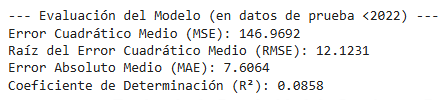
    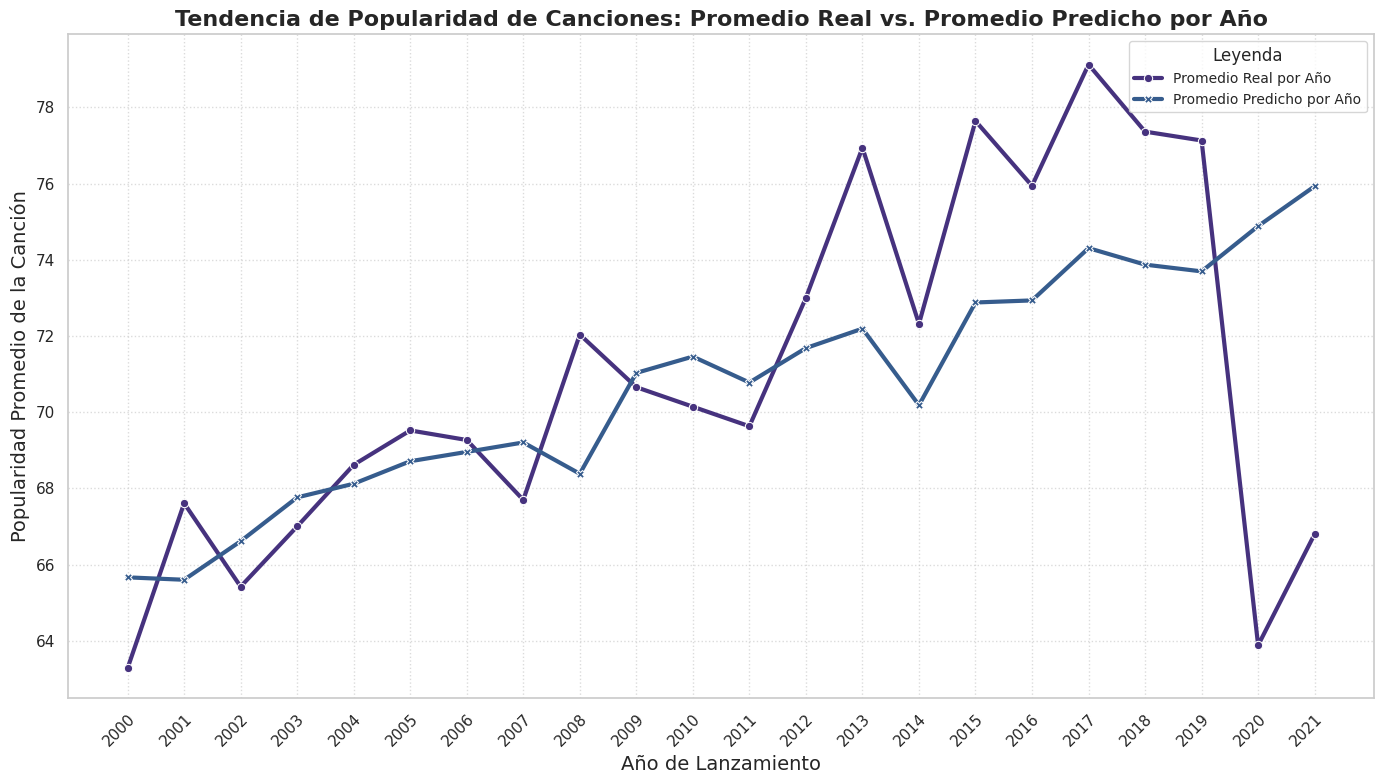
---


## 2. Regresión Ridge (Ridge)

* **Propósito:** Regresión lineal con regularización L2, reduce la magnitud de los coeficientes para prevenir el sobreajuste, pero no los lleva exactamente a cero.

* **Código Base (Ejemplo Estructura):**
    ```python
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.linear_model import Lasso # O Ridge, o LinearRegression
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, RobustScaler # Añadido RobustScaler por si se considera después
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline as SklearnPipeline
    import warnings

    # Suponiendo que 'df' ya está cargado y disponible
    df.dropna(inplace=True)

    df_2022 = df[df['year'] == 2022].copy()
    df_train_val = df[df['year'] != 2022].copy()

    numerical_features = [  'year', 'duration_s', 'interaction_dance_energy', 'interaction_valence_energy', 'interaction_loud_dance',
        'interaction_dance_valence', 'interaction_acoustic_energy',
        'danceability_sq', 'energy_sq', 'loudness_sq','artist_popularity']
    categorical_features = ['key','mode','time_signature']

    features = numerical_features + categorical_features

    X = df_train_val[features]
    y = df_train_val['track_popularity']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    REGRESSOR_TYPE = 'Ridge' # O 'Ridge'

    if REGRESSOR_TYPE == 'Lasso':
        regressor_instance = Lasso(max_iter=10000) # Aumentar max_iter para Lasso puede ser necesario
        alphas_to_test = [0.001, 0.01, 0.1, 1.0]
    elif REGRESSOR_TYPE == 'Ridge':
        regressor_instance = Ridge()
        alphas_to_test = [0.1, 1.0, 10.0, 100.0]
    else:
        raise ValueError("Tipo de regresor no soportado. Elige 'Lasso' o 'Ridge'.")

    numerical_transformer_for_grid = SklearnPipeline(steps=[
        ('iqr_capper', IQROutlierCapper(factor=1.5)),
        ('poly', PolynomialFeatures(include_bias=False, interaction_only=False)),
        ('scaler', StandardScaler()) # Podrías considerar RobustScaler aquí si quieres menos sensibilidad a outliers en el escalado
    ])

    preprocessor_for_grid = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer_for_grid, numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'
    )

    # Asegúrate de que el regresor aquí sea el que quieres probar (Lasso, Ridge)
    pipeline_for_grid = SklearnPipeline(steps=[
        ('preprocessor', preprocessor_for_grid),
        ('regressor', regressor_instance) # O Ridge(max_iter=10000)
    ])

    degrees_to_test = [1, 2, 3]
    param_grid = {
        'preprocessor__num__poly__degree': degrees_to_test,
        'regressor__alpha': alphas_to_test,
        'preprocessor__num__scaler': [StandardScaler(), RobustScaler()]
    }

    grid_search = GridSearchCV(estimator=pipeline_for_grid,
                              param_grid=param_grid,
                              cv=3,
                              scoring='r2',
                              verbose=1,
                              n_jobs=1)

    print(f"Entrenando GridSearchCV (buscando grado y alpha para {pipeline_for_grid.named_steps['regressor'].__class__.__name__})...")
    # IMPORTANTE: Usar los datos winsorizados para el entrenamiento y evaluación
    grid_search.fit(X_train, y_train)

    # --- Resultados de GridSearchCV ---
    print(f"\nMejores parámetros para {REGRESSOR_TYPE}:")
    print(grid_search.best_params_)
    print(f"Mejor R² (cross-validated): {grid_search.best_score_:.4f}")

    best_model_from_grid = grid_search.best_estimator_
    y_pred_test_grid = best_model_from_grid.predict(X_test)

    mse_test_grid = mean_squared_error(y_test, y_pred_test_grid)
    rmse_test_grid = np.sqrt(mse_test_grid)
    r2_test_grid = r2_score(y_test, y_pred_test_grid)
    mae_test_grid = mean_absolute_error(y_test, y_pred_test_grid)

    print(f"\n--- Evaluación del Mejor Modelo ({REGRESSOR_TYPE}) en Test ---")
    print(f"Grado Polinómico Óptimo: {grid_search.best_params_.get('preprocessor__num__poly__degree', 'N/A')}")
    print(f"Alpha Óptimo: {grid_search.best_params_['regressor__alpha']}")
    print(f"MSE: {mse_test_grid:.4f}")
    print(f"RMSE: {rmse_test_grid:.4f}")
    print(f"MAE: {mae_test_grid:.4f}")
    print(f"R²: {r2_test_grid:.4f}")

    if REGRESSOR_TYPE == 'Lasso':
    # Acceder a los coeficientes a través del paso 'regressor' del pipeline guardado
    final_lasso_model = best_model_from_grid.named_steps['regressor']
    if hasattr(final_lasso_model, 'coef_'):
        coefs = final_lasso_model.coef_
        n_selected_features = np.sum(np.abs(coefs) > 1e-6) # Considerar un umbral pequeño
        print(f"Características seleccionadas por Lasso: {n_selected_features} de {len(coefs)}")

    # --- Sección de Gráfica de Todos los Resultados de GridSearchCV ---
    cv_results_df = pd.DataFrame(grid_search.cv_results_)
    sns.set_theme(style="whitegrid", palette="viridis")
    plt.figure(figsize=(10, 6))

    for degree in degrees_to_test:
        subset = cv_results_df[cv_results_df['param_preprocessor__num__poly__degree'] == degree]
        if not subset.empty:
            plt.plot(subset['param_regressor__alpha'],
                    subset['mean_test_score'],
                    marker='o', linestyle='-', markersize=8,
                    label=f'Grado Polinómico {degree}')

    plt.xscale('log')
    plt.xlabel('Alpha (Escala Logarítmica)', fontsize=12)
    plt.ylabel('Puntuación R² Media (Validación Cruzada)', fontsize=12)
    plt.title(f'Rendimiento de {REGRESSOR_TYPE} por Grado Polinómico y Alpha', fontsize=14, weight='bold')
    plt.legend(title='Configuración', fontsize=10, title_fontsize=11)
    plt.grid(True, which="both", ls=":", alpha=0.7)
    plt.tight_layout()
    plt.show()

    # --- Gráfica de predicciones con el mejor modelo (solo líneas de promedio) ---
    if best_model_from_grid:
    best_degree_found = grid_search.best_params_.get('preprocessor__num__poly__degree', 'N/A')
    best_alpha_found = grid_search.best_params_['regressor__alpha']
    print(f"\n--- Gráfica de predicciones del mejor modelo ({REGRESSOR_TYPE} - Grado: {best_degree_found}, Alpha: {best_alpha_found:.4f}) ---")

    # Usar X_test['year'] ORIGINAL para el eje X de la gráfica
    X_to_plot_year = X_test['year']

    fig, ax = plt.subplots(figsize=(12, 7))
    sns.set_theme(style="whitegrid", palette="pastel") # Tema específico para esta gráfica
    df_plot_avg = pd.DataFrame({
        'year': X_to_plot_year,
        'Popularidad Real': y_test,
        'Popularidad Predicha': y_pred_test_grid
    })
    avg_by_year = df_plot_avg.groupby('year').mean().reset_index()
    avg_by_year_melted = avg_by_year.melt(
        id_vars='year',
        value_vars=['Popularidad Real', 'Popularidad Predicha'],
        var_name='Tipo de Popularidad',
        value_name='Popularidad Promedio'
    )
    pred_label = f'Promedio Predicho ({REGRESSOR_TYPE} Gr.{best_degree_found}, α={best_alpha_found:.3f})'
    avg_by_year_melted['Tipo de Popularidad'] = avg_by_year_melted['Tipo de Popularidad'].replace({
        'Popularidad Real': 'Promedio Real por Año',
        'Popularidad Predicha': pred_label
    })
    sns.lineplot(
        data=avg_by_year_melted, x='year', y='Popularidad Promedio',
        hue='Tipo de Popularidad', style='Tipo de Popularidad',
        markers=True, dashes=False, linewidth=3, ax=ax
    )
    ax.set_title(f'Tendencia de Popularidad: Promedio Real vs. Predicho\n(Modelo: {REGRESSOR_TYPE}, Grado {best_degree_found}, Alpha {best_alpha_found:.4f})', fontsize=15, weight='bold')
    ax.set_xlabel('Año de Lanzamiento', fontsize=12)
    ax.set_ylabel('Popularidad Promedio de la Canción', fontsize=12)

    unique_years = sorted(X_to_plot_year.unique())
    if len(unique_years) > 0:
        ax.set_xticks(unique_years)
        if len(unique_years) > 10:
            plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    ax.legend(title='Leyenda', title_fontsize='11', fontsize='9', loc='best', frameon=True)
    ax.grid(True, linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()
    ```

* **Errores/Áreas de Mejora Comunes:**
    * **No escalar las características:** Al igual que Lasso, Ridge es sensible a la escala.
    * Usar el valor `alpha` por defecto sin ajustarlo.
    * No usar validación cruzada para encontrar el mejor `alpha`.

* **Mejoras Aplicadas/Sugeridas:**
    * **Escalado de características:** Aplicar `StandardScaler` o similar.
    * **Ajuste de Hiperparámetros:** Usar `GridSearchCV` o `RandomizedSearchCV` para encontrar el `alpha` óptimo mediante validación cruzada.
* **Resultado**
---


## 3. Random Forest (RandomForestRegressor / RandomForestClassifier)

* **Propósito:** Modelo de ensamblaje (basado en árboles de decisión) robusto y generalmente con buen rendimiento. Menos sensible a la escala de las features.

* **Código Base (Ejemplo Estructura - Regresión):**
    ```python
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve # Added more metrics
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.feature_selection import RFE
    from imblearn.pipeline import Pipeline as ImbPipeline # Good practice for combining steps
    import matplotlib.pyplot as plt # For plotting ROC curve
    # Import SMOTE
    import seaborn as sns
    from imblearn.over_sampling import SMOTE
    # --- 1. Cargar y Preparar Datos ---

    # Suponiendo que tus datos están en un DataFrame llamado 'df'
    # Reemplaza esta parte con la carga real de tus datos si no están ya en un DataFrame
    # Ejemplo: df = pd.read_csv('your_song_data.csv')
    # O si ya lo tienes cargado, simplemente úsalo:
    # df = tu_dataframe_existente

    df.dropna(inplace=True)

    print("Shape of the DataFrame:", df.shape)
    print("\nData Types of Columns:\n", df.dtypes)

    # Definir la variable objetivo binaria
    df_2022 = df[df['year'] == 2022].copy()
    df_train_val = df[df['year'] != 2022].copy()

    popularity_threshold = df_train_val['track_popularity'].median()
    df_train_val['is_popular'] = (df_train_val['track_popularity'] > popularity_threshold).astype(int)
    # Seleccionar características (features)
    # Excluimos IDs, nombres, URL, popularidad original, y géneros por simplicidad inicial.
    # 'year' podría ser relevante. 'artist_genres' necesitaría preprocesamiento (ej. One-Hot Encoding).
    numerical_features = [  'year', 'duration_s', 'interaction_dance_energy', 'interaction_valence_energy', 'interaction_loud_dance',
        'interaction_dance_valence', 'interaction_acoustic_energy',
        'danceability_sq', 'energy_sq', 'loudness_sq','artist_popularity']

    categorical_features = ['key','mode','time_signature']

    features = numerical_features + categorical_features
    X = df_train_val[features]
    y = df_train_val['is_popular']

    # Separar conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # stratify=y ayuda con el balance de clases

    print("\nShape of X_train before capping:", X_train.shape)
    print("Shape of X_test before capping:", X_test.shape)

    # --- 4. Definición de Pipeline y Búsqueda de Hiperparámetros ---
    # El pipeline ahora operará sobre los datos ya acotados (X_train_capped)

    numerical_pipeline = ImbPipeline([
        ('iqr_capper', IQROutlierCapper(factor=1.5)),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_pipeline, numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'
    )

    # Usar un Pipeline para combinar RFE, SMOTE, escalado y modelo
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('rfe', RFE(estimator=RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced_subsample'))), # n_estimators reducido para RFE
        ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
        ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced_subsample'))
    ])

    n_features_to_test_rfe = [10, 15, 20] # EJEMPLO: AJUSTAR
    if X_train.shape[0] > 0 : # Solo si X_train no está vacío
        try:
            # Intento de estimar el número de features después del preprocesamiento
            # Es mejor calcularlo explícitamente una vez si es posible
            _temp_preprocessor = preprocessor.fit(X_train)
            _n_features_after_preprocessing = _temp_preprocessor.transform(X_train).shape[1]
            if _n_features_after_preprocessing > 0:
                n_features_to_test_rfe = [
                    max(1,min(5, _n_features_after_preprocessing)), # Mínimo de 5 o total
                    max(1,min(10, int(_n_features_after_preprocessing * 0.5))),
                    max(1,min(15, int(_n_features_after_preprocessing * 0.75))),
                    max(1,_n_features_after_preprocessing) # Todas las features
                ]
                n_features_to_test_rfe = sorted(list(set(n_features_to_test_rfe))) # Eliminar duplicados y ordenar
                n_features_to_test_rfe = [n for n in n_features_to_test_rfe if n > 0] # Asegurar que no sea cero
                if not n_features_to_test_rfe: n_features_to_test_rfe = [min(5, _n_features_after_preprocessing)]

            print(f"Estimación para 'rfe__n_features_to_select': {n_features_to_test_rfe} (basado en {_n_features_after_preprocessing} features post-preprocesamiento)")
        except Exception as e:
            print(f"No se pudo estimar n_features_to_select dinámicamente: {e}. Usando lista genérica: {n_features_to_test_rfe}")
    else:
        print(f"X_train está vacío, usando lista genérica para n_features_to_test_rfe: {n_features_to_test_rfe}")

    param_grid = {
        'rfe__n_features_to_select': n_features_to_test_rfe,
        'classifier__n_estimators': [100, 150], # Ajustado para rapidez
        'classifier__max_depth': [10, None],
        'classifier__min_samples_split': [2, 10],
        'classifier__min_samples_leaf': [1, 5],
        'smote__k_neighbors': [3, 7] # Hiperparámetro para SMOTE
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='f1_weighted', n_jobs=-1, verbose=2) # cv reducido para rapidez

    # Ajustar GridSearchCV a los datos de entrenamiento CAPPED
    print("\nIniciando Hyperparameter Tuning con datos acotados...")
    grid_search.fit(X_train, y_train)

    print("\nHyperparameter Tuning Complete.")
    print('Best parameters found by GridSearchCV:', grid_search.best_params_)
    print('Best cross-validation score (F1):', grid_search.best_score_)
    best_pipeline = grid_search.best_estimator_

    # --- 6. Evaluación del Modelo ---
    # Evaluar con los datos de prueba CAPPED
    print("\nEvaluating the model with best parameters on capped test data...")
    y_pred = best_pipeline.predict(X_test)
    y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"\nAccuracy (with best params): {accuracy:.4f}")
    print("\nClassification Report (with best params):\n", report)
    print("\nConfusion Matrix (with best params):\n", conf_matrix)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix (Mejores Parámetros)')
    plt.xlabel('Predicho')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    print(f"\nROC AUC Score (with best params): {roc_auc:.4f}")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # --- Información sobre Características Seleccionadas ---
    if hasattr(best_pipeline.named_steps['rfe'], 'support_'):
        n_selected_by_rfe = best_pipeline.named_steps['rfe'].n_features_
        print(f"\nNúmero de características seleccionadas por RFE: {n_selected_by_rfe}")
        try:
            preprocessor_fitted = best_pipeline.named_steps['preprocessor']
            rfe_selector = best_pipeline.named_steps['rfe']
            if hasattr(preprocessor_fitted, 'get_feature_names_out'):
                feature_names_after_preprocessing = preprocessor_fitted.get_feature_names_out()
                selected_feature_names_by_rfe = feature_names_after_preprocessing[rfe_selector.support_]
                print(f"Nombres de las características seleccionadas ({len(selected_feature_names_by_rfe)}):")
                for i, name in enumerate(selected_feature_names_by_rfe):
                    print(f"  {i+1}. {name}")
            else:
                print("No se pudieron obtener los nombres de las features procesadas (get_feature_names_out no disponible).")
        except Exception as e:
            print(f"Error al intentar obtener nombres de características seleccionadas: {e}")
    else:
        print("\nEl paso RFE no se encontró o el atributo 'support_' está ausente.")
    ```
    *Nota: Para clasificación (`RandomForestClassifier`), se usarían métricas apropiadas y `scoring` diferente.*

* **Errores/Áreas de Mejora Comunes:**
    * Usar hiperparámetros por defecto, que pueden no ser óptimos y llevar a sobreajuste (árboles muy profundos) o subajuste.
    * No ajustar `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`.
    * `GridSearchCV` puede ser extremadamente lento debido al gran número de combinaciones.
    * No analizar la importancia de las características proporcionada por el modelo.

* **Mejoras Aplicadas/Sugeridas:**
    * **Ajuste de Hiperparámetros:** Usar `RandomizedSearchCV` (más eficiente que GridSearch) para explorar un rango amplio de hiperparámetros clave.
    * Aumentar `n_estimators` generalmente mejora el rendimiento (hasta cierto punto), pero incrementa el tiempo de cómputo.
    * Controlar la complejidad del árbol (`max_depth`, `min_samples_split`, `min_samples_leaf`) para evitar overfitting.
    * Analizar `feature_importances_` para entender qué variables son más influyentes en las predicciones.
* **Resultado**
---

## 4. Gradient Boosting (GradientBoostingRegressor / GradientBoostingClassifier)

* **Propósito:** Otro modelo de ensamblaje potente que construye árboles secuencialmente, donde cada nuevo árbol intenta corregir los errores de los anteriores.

* **Código Base (Ejemplo Estructura - Regresión):**
    ```python
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
    from sklearn.preprocessing import StandardScaler, OneHotEncoder # Añadido OneHotEncoder
    from sklearn.compose import ColumnTransformer # Necesario para preprocesamiento diferenciado
    from sklearn.pipeline import Pipeline
    from sklearn.base import BaseEstimator, TransformerMixin # Para transformador personalizado
    import matplotlib.pyplot as plt
    import seaborn as sns

    print("Shape of the DataFrame:", df.shape)
    print("\nData Types of Columns:\n", df.dtypes)

    df.dropna(inplace=True)

    # Definir la variable objetivo binaria
    # Podemos usar la mediana como umbral, o un percentil, o un valor fijo (ej. > 50 es popular)
    popularity_threshold = df['track_popularity'].median()
    # popularity_threshold = 50 # Alternativa: usar un valor fijo

    df['is_popular'] = (df['track_popularity'] > popularity_threshold).astype(int)

    # Seleccionar características (features)
    # Excluimos IDs, nombres, URL, popularidad original, y géneros por simplicidad inicial.
    # 'year' podría ser relevante. 'artist_genres' necesitaría preprocesamiento (ej. One-Hot Encoding).
    numerical_features = [  'year', 'duration_s', 'interaction_dance_energy', 'interaction_valence_energy', 'interaction_loud_dance',
        'interaction_dance_valence', 'interaction_acoustic_energy',
        'danceability_sq', 'energy_sq', 'loudness_sq','artist_popularity']
    categorical_features = ['key','mode','time_signature']

    features = numerical_features + categorical_features
    X = df[features]
    y = df['is_popular']

    # Separar conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # stratify=y ayuda con el balance de clases

    print("\nShape of X_train:", X_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of y_test:", y_test.shape)

    numerical_pipeline = Pipeline([
        ('iqr_capper', IQROutlierCapper(factor=1.5)),
        ('scaler', StandardScaler())
    ])

    preprocessor_ct = ColumnTransformer(
        transformers=[
            ('num', numerical_pipeline, numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'
    )

    pipeline = Pipeline([
        ('preprocessor', preprocessor_ct),
        ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
    ])

    # --- 2. Entrenamiento del Modelo ---
    print("\nTraining the model (GradientBoostingClassifier) with capped data...")
    pipeline.fit(X_train, y_train)
    print("Model training complete.")

    # --- 3. Evaluación del Modelo ---
    print("\nEvaluating the model with capped test data...")
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"\nAccuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", report)

    print("\nConfusion Matrix:\n", conf_matrix)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues') # Añadido sns.heatmap
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"\nROC AUC Score: {roc_auc:.4f}")

    # Visualizar la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    ```
    *Nota: Para clasificación (`GradientBoostingClassifier`), se usarían métricas y `scoring` apropiados.*

* **Errores/Áreas de Mejora Comunes:**
    * Similar a Random Forest, usar hiperparámetros por defecto puede ser subóptimo.
    * Sensible a los hiperparámetros, especialmente `learning_rate` y `n_estimators`. Un `learning_rate` bajo requiere más `n_estimators`.
    * Puede ser propenso a sobreajuste si no se controlan bien los parámetros (`max_depth`, `subsample`, etc.).
    * Puede ser computacionalmente más intensivo que Random Forest.

* **Mejoras Aplicadas/Sugeridas:**
    * **Ajuste de Hiperparámetros:** Indispensable usar `RandomizedSearchCV` o `GridSearchCV` para encontrar una buena combinación de `n_estimators`, `learning_rate`, `max_depth`, `subsample`, etc.
    * **Early Stopping:** Considerar usar la funcionalidad de parada temprana (disponible en algunas implementaciones como XGBoost, LightGBM, o manualmente con `staged_predict`) para encontrar el número óptimo de `n_estimators` y evitar sobreajuste, usando un conjunto de validación.
    * Analizar `feature_importances_`.
* **Resultado**
---

## 5. Regresión Logística (LogisticRegression)

* **Propósito:** Modelo lineal para problemas de clasificación binaria (o multiclase con extensiones).

* **Código Base (Ejemplo Estructura):**
    ```python
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.base import BaseEstimator, TransformerMixin
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("Shape of the DataFrame:", df.shape)
    print("\nData Types of Columns:\n", df.dtypes)

    df.dropna(inplace=True)

    popularity_threshold = df['track_popularity'].median()

    df['is_popular'] = (df['track_popularity'] > popularity_threshold).astype(int)

    df_2022 = df[df['year'] == 2022].copy()
    df_train_val = df[df['year'] != 2022].copy()
    # Seleccionar características (features)

    # Excluimos IDs, nombres, URL, popularidad original, y géneros por simplicidad inicial.
    # 'year' podría ser relevante. 'artist_genres' necesitaría preprocesamiento (ej. One-Hot Encoding).
    num_features = [
        'year', 'duration_s', 'interaction_dance_energy', 'interaction_valence_energy', 'interaction_loud_dance',
        'interaction_dance_valence', 'interaction_acoustic_energy',
        'danceability_sq', 'energy_sq', 'loudness_sq','artist_popularity'
    ]
    categorical_features = ['key','mode','time_signature']
    features = num_features + categorical_features

    X = df_train_val[features]
    y = df_train_val['is_popular']

    # Separar conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # stratify=y ayuda con el balance de clases

    print("\nShape of X_train before capping:", X_train.shape)
    print("Shape of X_test before capping:", X_test.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of y_test:", y_test.shape)

    numeric_pipeline = Pipeline([
        ('iqr_capper', IQROutlierCapper(factor=1.5)),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_pipeline, features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'
    )

    # Usar un Pipeline para combinar escalado y modelo
    # El pipeline ahora operará sobre los datos ya acotados (X_train_capped)
    pipeline = Pipeline([
        ('preprocessor',preprocessor),
        ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)) # Aumentar max_iter si es necesario
    ])

    # --- 2. Entrenamiento del Modelo ---
    print("\nTraining the model (LogisticRegression) with capped data...")
    pipeline.fit(X_train, y_train)
    print("Model training complete.")

    # --- 3. Evaluación del Modelo ---
    print("\nEvaluating the model with capped test data...")
    y_pred = pipeline.predict(X_test) # <<<<<<< USAR DATOS ACOTADOS AQUÍ
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"\nAccuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", report)

    print("\nConfusion Matrix:\n", conf_matrix)
    plt.figure(figsize=(6,4)) # Crear una figura antes de llamar a heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Popular', 'Popular'], yticklabels=['No Popular', 'Popular'])
    plt.title('Confusion Matrix (Logistic Regression)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"\nROC AUC Score: {roc_auc:.4f}")

    # Visualizar la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regression)')
    plt.legend(loc="lower right")
    plt.show()
    ```

* **Errores/Áreas de Mejora Comunes:**
    * **No escalar las características:** Es crucial para modelos con regularización.
    * No ajustar el parámetro de regularización `C` y el tipo de `penalty`.
    * Usar `accuracy` como única métrica en datasets desbalanceados.
    * No verificar la convergencia (aumentar `max_iter` si es necesario).
    * Seleccionar `solver` incompatible con la `penalty` elegida.

* **Mejoras Aplicadas/Sugeridas:**
    * **Escalado de características:** Aplicar `StandardScaler`.
    * **Ajuste de Hiperparámetros:** Usar `GridSearchCV` para `C`, `penalty`, y `solver`.
    * **Evaluación Completa:** Utilizar `classification_report` (precision, recall, f1-score), `confusion_matrix`, y `roc_auc_score`, especialmente si las clases están desbalanceadas.
    * Visualizar la curva ROC.
    * Considerar el manejo de clases desbalanceadas (e.g., `class_weight='balanced'`, sobremuestreo, submuestreo).
* **Resultado**
---

## 6. Support Vector Classifier (SVC)

* **Propósito:** Modelo potente para clasificación (también existe SVR para regresión), efectivo en espacios de alta dimensión y cuando el número de dimensiones es mayor que el número de muestras.

* **Código Base (Ejemplo Estructura):**
    ```python
    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVC # Usando Support Vector Classifier
    from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
    from sklearn.pipeline import Pipeline

    print("Shape of the DataFrame:", df.shape)
    print("\nData Types of Columns:\n", df.dtypes)

    # Definir la variable objetivo binaria
    popularity_threshold = df['track_popularity'].median()

    df['is_popular'] = (df['track_popularity'] > popularity_threshold).astype(int)

    df_2022 = df[df['year'] == 2022].copy()
    df_train_val = df[df['year'] != 2022].copy()

    # Seleccionar características (features)
    # Excluimos IDs, nombres, URL, popularidad original, y géneros por simplicidad inicial.
    # 'year' podría ser relevante. 'artist_genres' necesitaría preprocesamiento (ej. One-Hot Encoding).
    num_features = [
        'year', 'duration_s', 'interaction_dance_energy', 'interaction_valence_energy', 'interaction_loud_dance',
        'interaction_dance_valence', 'interaction_acoustic_energy',
        'danceability_sq', 'energy_sq', 'loudness_sq','artist_popularity'
    ]
    categorical_features = ['key','mode','time_signature']
    features = num_features + categorical_features

    X = df_train_val[features]
    y = df_train_val['is_popular']

    # Separar conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # stratify=y ayuda con el balance de clases

    print("\nShape of X_train before capping:", X_train.shape)
    print("Shape of X_test before capping:", X_test.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of y_test:", y_test.shape)

    numeric_pipeline = Pipeline([
        ('iqr_capper', IQROutlierCapper(factor=1.5)),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_pipeline, features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'
        )

    # Usar un Pipeline para combinar escalado y modelo
    # El pipeline ahora operará sobre los datos ya acotados (X_train_capped)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC(probability=True, random_state=42, C=1.0, kernel='rbf'))
    ])

    # --- 2. Entrenamiento del Modelo ---
    print("\nTraining the model (SVC) with capped data...")
    pipeline.fit(X_train, y_train)
    print("Model training complete.")

    # --- 3. Evaluación del Modelo ---
    print("\nEvaluating the model with capped test data...")
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"\nAccuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", report)

    print("\nConfusion Matrix:\n", conf_matrix)
    plt.figure(figsize=(6,4)) # Crear una figura antes de llamar a heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Popular', 'Popular'], yticklabels=['No Popular', 'Popular'])
    plt.title('Confusion Matrix (SVC)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"\nROC AUC Score: {roc_auc:.4f}")

    # Visualizar la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (SVC)')
    plt.legend(loc="lower right")
    plt.show()

    ```

* **Errores/Áreas de Mejora Comunes:**
    * **No escalar las características:** Fundamental para SVC, especialmente con kernels no lineales (como RBF).
    * No ajustar los hiperparámetros `C`, `gamma` y `kernel`. El rendimiento de SVC es muy sensible a estos.
    * Alto coste computacional, especialmente con datasets grandes y durante la búsqueda de hiperparámetros.
    * No habilitar `probability=True` si se necesita `predict_proba` (para ROC AUC), aunque esto ralentiza el entrenamiento/predicción.

* **Mejoras Aplicadas/Sugeridas:**
    * **Escalado de características:** Imprescindible (`StandardScaler`).
    * **Ajuste de Hiperparámetros:** Usar `GridSearchCV` o `RandomizedSearchCV`. Dado el coste, puede ser necesario limitar el espacio de búsqueda o usar menos folds (`cv`).
    * **Selección de Kernel:** Probar diferentes kernels (`linear`, `rbf`). `rbf` es una buena opción por defecto, pero `linear` puede ser mejor si los datos son linealmente separables.
    * **Evaluación Completa:** Usar métricas apropiadas para clasificación y considerar `roc_auc_score`.
    * Si el dataset es muy grande, considerar usar `LinearSVC` (más rápido, similar a SVC con kernel lineal) o técnicas de submuestreo.
* **Resultado**
---

## Conclusiones generales

Tras la implementación, evaluación y mejora de los diversos modelos predictivos (Regresión Lineal, Lasso, Ridge, Red Neuronal, Random Forest, Gradient Boosting, Regresión Logística y SVC) sobre el dataset `playlist_2010to2022.csv`, se extraen las siguientes conclusiones fundamentales:

1.  **La Rigurosidad en el Preprocesamiento es Determinante, No Opcional:**
    * **Argumento:** Se observó que modelos como **Lasso, Ridge, Redes Neuronales (MLP), Regresión Logística y SVC** son intrínsecamente sensibles a la escala de las características de entrada debido a sus fundamentos matemáticos (cálculo de distancias, regularización basada en la magnitud de coeficientes, funciones de activación, gradientes). Ignorar el escalado (e.g., usando `StandardScaler`) conduce a que las variables con rangos numéricos mayores dominen el proceso de aprendizaje y la regularización, resultando en modelos subóptimos, coeficientes sesgados y una convergencia más lenta o inestable, especialmente en redes neuronales y modelos regularizados.
    * **Impacto:** Un preprocesamiento adecuado (escalado, codificación de categóricas, manejo de nulos) no es una mera formalidad, sino un requisito para la validez y el rendimiento comparativo de estos algoritmos. Modelos como **Random Forest y Gradient Boosting**, basados en árboles, son menos sensibles a la escala monotónica, pero incluso ellos pueden beneficiarse indirectamente si el escalado ayuda a otros pasos del pipeline o a la interpretabilidad. La decisión de escalar debe basarse en el algoritmo elegido.

2.  **La Optimización de Hiperparámetros Desbloquea el Potencial Real de los Modelos:**
    * **Argumento:** Confiar en los hiperparámetros por defecto de `scikit-learn` es, en la práctica, entrenar un modelo arbitrario. Cada dataset posee características únicas, y los hiperparámetros (como `alpha` en Lasso/Ridge, la arquitectura y tasa de aprendizaje en MLP, `C` y `gamma` en SVC, o `n_estimators` y `max_depth` en RF/GB) controlan aspectos cruciales como la complejidad del modelo, la regularización (prevención de sobreajuste) y la capacidad de adaptación a los datos.
    * **Impacto:** La aplicación de técnicas como `GridSearchCV` o, preferiblemente por eficiencia, `RandomizedSearchCV` con validación cruzada es **indispensable** para explorar el espacio de configuraciones y encontrar un modelo que generalice bien a datos no vistos. Sin este ajuste, es probable que los modelos sufran de sobreajuste (memorizan el entrenamiento pero fallan en la prueba) o subajuste (demasiado simples para capturar patrones), y las comparaciones de rendimiento entre modelos no serían justas ni representativas de su verdadero potencial. El coste computacional de esta búsqueda es una inversión necesaria para obtener resultados fiables.

3.  **La Validación Cruzada es el Estándar de Oro para Estimar la Generalización:**
    * **Argumento:** Evaluar un modelo únicamente sobre una única división de entrenamiento/prueba (`train_test_split`) proporciona una estimación del rendimiento muy dependiente de la aleatoriedad de esa división específica. Un resultado "bueno" o "malo" podría ser una casualidad. La validación cruzada (e.g., K-Fold) mitiga este problema entrenando y evaluando el modelo múltiples veces sobre diferentes subconjuntos de los datos de entrenamiento.
    * **Impacto:** Proporciona una estimación **más robusta y fiable** del error de generalización del modelo. Es fundamental usarla no solo para la evaluación final, sino integrada en el proceso de ajuste de hiperparámetros (`GridSearchCV` y `RandomizedSearchCV` lo hacen internamente) para asegurar que la selección del "mejor" modelo se base en un rendimiento estable a través de diferentes particiones de los datos. Esto aumenta la confianza en que el modelo se comportará de manera similar con datos futuros.

4.  **La Elección de Métricas Debe Alinear el Objetivo del Negocio con la Evaluación Técnica:**
    * **Argumento:** Diferentes métricas capturan distintos aspectos del rendimiento. En **regresión**, R² indica la proporción de varianza explicada, mientras que MAE y MSE cuantifican el error promedio en las unidades originales (siendo MSE más sensible a errores grandes). En **clasificación**, la `Accuracy` (Exactitud) puede ser engañosa en datasets desbalanceados. Métricas como `Precision` (Precisión), `Recall` (Sensibilidad), `F1-Score` (media armónica de Precision y Recall) y el área bajo la curva ROC (`ROC AUC`) ofrecen una visión mucho más completa, especialmente cuando los costes de los falsos positivos y falsos negativos son diferentes.
    * **Impacto:** Seleccionar (y reportar) un conjunto adecuado de métricas es crucial. Por ejemplo, si el objetivo es identificar correctamente una clase minoritaria (e.g., canciones "muy populares"), el `Recall` para esa clase es más importante que la `Accuracy` general. La matriz de confusión y la curva ROC (como se implementó en la función de evaluación del notebook) son herramientas visuales esenciales para entender *dónde* y *cómo* falla o acierta el modelo clasificador. La métrica usada en `scoring` dentro de `GridSearchCV` debe reflejar la métrica más importante para el problema.

5.  **Existe un Compromiso Inherente entre Rendimiento, Interpretabilidad y Complejidad:**
    * **Argumento:** Modelos como la Regresión Lineal, Logística y Lasso/Ridge son relativamente **interpretables** (se puede analizar el impacto de cada característica a través de los coeficientes), pero pueden tener un rendimiento limitado si las relaciones subyacentes en los datos no son lineales. Modelos como Random Forest y Gradient Boosting a menudo ofrecen **mayor rendimiento predictivo** y capturan interacciones complejas, pero su interpretabilidad es menor (aunque se puede obtener la importancia de las características). Las Redes Neuronales y SVC (con kernels no lineales) pueden ser aún más potentes pero operan en gran medida como "cajas negras".
    * **Impacto:** La elección final del modelo no debería basarse únicamente en la métrica de rendimiento más alta. Se debe considerar el contexto del problema: ¿Es crucial entender *por qué* se hace una predicción? ¿Cuánto coste computacional (tiempo de entrenamiento, ajuste de hiperparámetros) es aceptable? Modelos más simples y rápidos pueden ser preferibles si su rendimiento es "suficientemente bueno" y la interpretabilidad es clave. Este análisis sugiere la necesidad de evaluar este espectro de modelos para encontrar el balance adecuado para el objetivo específico del proyecto con las playlists.

En resumen, este análisis comparativo subraya que la construcción de modelos predictivos efectivos es un proceso iterativo que va más allá de simplemente aplicar algoritmos. Requiere una atención meticulosa al preprocesamiento adaptado a cada modelo, una exploración sistemática de los hiperparámetros guiada por validación cruzada robusta, y una evaluación crítica utilizando métricas relevantes para el problema. Solo así se pueden obtener modelos fiables, cuyo rendimiento sea representativo y que aporten valor real al objetivo de predicción planteado.

# 🧠 **Red neuronal**

# Modelado: Red Neuronal para Predicción de Popularidad

En esta etapa del proyecto, se desarrolló e implementó una red neuronal utilizando TensorFlow/Keras para predecir la popularidad de las pistas musicales (`track_popularity`). Este modelo se entrena con datos históricos (años anteriores a 2022) y se evalúa en un conjunto de prueba para medir su capacidad de generalización. Finalmente, se utiliza para predecir la popularidad de las canciones del año 2022.

## Código Implementado

El siguiente bloque de código muestra la implementación de la red neuronal, incluyendo la preparación de datos, el preprocesamiento mediante pipelines, la construcción del modelo, el entrenamiento y la evaluación:

```python
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # Importado pero no usado directamente en el pipeline mostrado
from sklearn.base import BaseEstimator, TransformerMixin # Necesario si IQROutlierCapper es personalizado
import matplotlib.pyplot as plt

# # Asumiendo que tu DataFrame 'df' ya está cargado
# df = pd.read_csv('tu_archivo.csv')

# Eliminar filas con valores nulos (en este caso, se hace al inicio)
df.dropna(inplace=True)

# Selección de características (X) y objetivo (y)
target = 'track_popularity'

# Separar datos de 2022 para predicción futura
df_2022 = df[df['year'] == 2022].copy()
# Usar datos anteriores a 2022 para entrenamiento y validación
df_train_val = df[df['year'] != 2022].copy()

# Definición de características numéricas y categóricas
# Incluye características originales y las de interacción/polinómicas creadas en Feature Engineering
numerical_features = ['year', 'duration_s', 'interaction_dance_energy', 'interaction_valence_energy', 'interaction_loud_dance',
    'interaction_dance_valence', 'interaction_acoustic_energy',
    'danceability_sq', 'energy_sq', 'loudness_sq']
categorical_features = ['key', 'mode', 'time_signature']

features = numerical_features + categorical_features

X = df_train_val[features]
y = df_train_val[target]

# --- 2. Dividir Datos ANTES de aplicar transformadores ---
# Esta es una práctica crucial para evitar la fuga de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Definición de Pipelines de Preprocesamiento ---

# Pipeline para características numéricas: aplica un 'capping' de outliers (si IQROutlierCapper está definido)
# y luego escala los datos
# Nota: La clase IQROutlierCapper no está incluida en este snippet, se asume su existencia.
class IQROutlierCapper(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor
        self.lower_bounds = {}
        self.upper_bounds = {}

    def fit(self, X, y=None):
        X_numeric = X.select_dtypes(include=np.number)
        for col in X_numeric.columns:
            Q1 = X_numeric[col].quantile(0.25)
            Q3 = X_numeric[col].quantile(0.75)
            IQR = Q3 - Q1
            self.lower_bounds[col] = Q1 - self.factor * IQR
            self.upper_bounds[col] = Q3 + self.factor * IQR
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in X_copy.select_dtypes(include=np.number).columns:
            if col in self.lower_bounds and col in self.upper_bounds:
                 # Asegurarse de que los límites se apliquen solo a la columna correcta y manejar NaNs
                lower = self.lower_bounds[col]
                upper = self.upper_bounds[col]
                X_copy[col] = np.where(X_copy[col] < lower, lower, X_copy[col])
                X_copy[col] = np.where(X_copy[col] > upper, upper, X_copy[col])
        return X_copy

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Añadido imputador por si acaso, aunque dropna se hizo antes
    ('iqr_capper', IQROutlierCapper(factor=1.5)), # Nuestro transformador personalizado (si está definido)
    ('scaler', StandardScaler()) # Escalado estándar
])

# Combinar pipelines usando ColumnTransformer para aplicar diferentes transformaciones a diferentes columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough' # Mantener otras columnas no listadas (si las hay)
)

print("\nAplicando preprocesamiento con Pipelines y ColumnTransformer...")
# Ajustar y transformar el conjunto de entrenamiento; solo transformar el conjunto de prueba
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Obtener la forma de entrada después del preprocesamiento (One-Hot Encoding puede aumentar el número de columnas)
input_shape_dim = X_train_processed.shape[1]

print(f"Forma final de los datos de entrenamiento procesados: {X_train_processed.shape}")
print(f"Forma final de los datos de prueba procesados: {X_test_processed.shape}")
print(f"Dimensión de entrada para la red neuronal: {input_shape_dim}")

# --- 5. Construir Modelo de Red Neuronal ---
l1_factor = 0.0005 # Factor para la regularización L1

# Modelo Secuencial de Keras
model = keras.Sequential(
    [
        # Capa de Entrada: define la forma de los datos de entrada
        layers.Input(shape=(input_shape_dim,), name='Capa_Entrada'),

        # Capas Ocultas con Regularización L1, Batch Normalization, Activación ReLU y Dropout
        layers.Dense(128, kernel_regularizer=keras.regularizers.L1(l1_factor), name='Capa_Oculta_1'),
        layers.BatchNormalization(), # Normaliza las salidas de la capa densa
        layers.Activation('relu'), # Función de activación ReLU
        layers.Dropout(0.3), # Apagado (dropout) para regularización

        layers.Dense(64, kernel_regularizer=keras.regularizers.L1(l1_factor), name='Capa_Oculta_2'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(64, kernel_regularizer=keras.regularizers.L1(l1_factor), name='Capa_Oculta_3'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(32, kernel_regularizer=keras.regularizers.L1(l1_factor), name='Capa_Oculta_4'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        # Capa de Salida: una sola neurona con activación lineal para problemas de regresión
        layers.Dense(1, activation='linear', name='Capa_Salida')
    ],
    name="Modelo_Prediccion_Popularidad_Keras" # Nombre del modelo
)
model.summary() # Muestra un resumen de la arquitectura del modelo

# --- 6. Compilación del Modelo ---
# Configura el optimizador, la función de pérdida y las métricas a seguir
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.001) # Optimizador Adam con tasa de aprendizaje específica

model.compile(optimizer=optimizer_adam,
              loss='mean_squared_error', # Función de pérdida para regresión
              metrics=['mean_absolute_error']) # Métrica adicional para evaluación

# --- 7. Entrenamiento del Modelo ---
print("\nIniciando entrenamiento del modelo...")

# Callback para Early Stopping: detiene el entrenamiento si la métrica de validación deja de mejorar
early_stopping_callback = EarlyStopping(
    monitor='val_mean_absolute_error', # Monitorea el Error Absoluto Medio en los datos de validación
    patience=20, # Número de épocas sin mejora después del cual el entrenamiento se detendrá
    verbose=1, # Muestra mensajes cuando Early Stopping se activa
    restore_best_weights=True # Restaura los pesos del modelo de la época con el mejor valor de la métrica monitoreada
)

# Entrenar el modelo
history = model.fit(
    X_train_processed,
    y_train.astype(np.float32), # Asegura que los datos objetivo sean float32
    epochs=150, # Número máximo de épocas
    batch_size=32, # Tamaño del lote
    validation_data=(X_test_processed,y_test.astype(np.float32)), # Datos de validación (conjunto de prueba en este caso)
    callbacks=[early_stopping_callback], # Lista de callbacks a usar
    verbose=1 # Muestra el progreso del entrenamiento por época
)
print("Entrenamiento completado.")

# --- 8. Evaluación del Modelo ---
print("\nEvaluando el modelo en el conjunto de prueba...")
# Evaluar el modelo en el conjunto de prueba para obtener la pérdida final y las métricas
results = model.evaluate(X_test_processed, y_test, verbose=0)
print(f"Pérdida en prueba (MSE): {results[0]:.4f}")
print(f"Error Absoluto Medio (MAE) en prueba: {results[1]:.4f}")
print(f"(En promedio, las predicciones se desvían en {results[1]:.2f} puntos de la popularidad real)")

# Calcular el Coeficiente de Determinación (R²) en el conjunto de prueba
predictions = model.predict(X_test_processed)
r2 = r2_score(y_test, predictions)
print(f"Coeficiente de Determinación (R^2) en prueba: {r2:.4f}")


# --- 9. (Opcional) Visualizar historial de entrenamiento ---
# Función para graficar la pérdida y el MAE durante el entrenamiento
def plot_history(history_obj, best_epoch_metric='val_mean_absolute_error'):
    hist = pd.DataFrame(history_obj.history)
    hist['epoch'] = history_obj.epoch

    # Encontrar la mejor época basada en la métrica de validación monitoreada por Early Stopping
    best_epoch_val = np.nan
    if best_epoch_metric in hist and not hist[best_epoch_metric].empty:
        best_epoch_idx = hist[best_epoch_metric].idxmin()
        best_epoch_val = hist.loc[best_epoch_idx, 'epoch']
        print(f"Mejor época (según {best_epoch_metric}, índice {best_epoch_idx}): {int(best_epoch_val) + 1}")

    plt.figure(figsize=(14, 6))

    # Gráfico de MAE
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Error de Entrenamiento (MAE)')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label = 'Error de Validación (MAE)')
    # Marcar la mejor época según MAE de validación
    if not np.isnan(best_epoch_val) and best_epoch_metric == 'val_mean_absolute_error':
        plt.axvline(x=best_epoch_val, color='r', linestyle='--', label=f'Mejor Época ({int(best_epoch_val)+1})')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.title('MAE de Entrenamiento y Validación')

    # Gráfico de Pérdida (MSE)
    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error (Loss)')
    plt.plot(hist['epoch'], hist['loss'], label='Pérdida de Entrenamiento (MSE)')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Pérdida de Validación (MSE)')

    # Marcar la mejor época de Loss de validación (opcional, si es relevante)
    best_epoch_loss_val = np.nan
    if 'val_loss' in hist and not hist['val_loss'].empty:
        best_epoch_loss_idx = hist['val_loss'].idxmin()
        best_epoch_loss_val = hist.loc[best_epoch_loss_idx, 'epoch']
        # Puedes decidir si marcar ambas o solo la que usaste para Early Stopping
        if best_epoch_metric != 'val_loss' and not np.isnan(best_epoch_val):
             plt.axvline(x=best_epoch_val, color='g', linestyle=':', label=f'Mejor Época MAE ({int(best_epoch_val)+1})')
        plt.axvline(x=best_epoch_loss_val, color='r', linestyle='--', label=f'Mejor Época Loss ({int(best_epoch_loss_val)+1})')

    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.title('Pérdida (MSE) de Entrenamiento y Validación')
    plt.tight_layout()
    plt.show()

# Llamar a la función para mostrar los gráficos de historial
plot_history(history)

# --- 10. (Opcional) Predicciones en datos de 2022 ---
# Usar el modelo entrenado para predecir la popularidad de las canciones de 2022
if not df_2022.empty and 'preprocessor' in locals() and 'model' in locals():
    print(f"\n--- Realizando predicciones para {len(df_2022)} canciones de 2022 ---")
    # Seleccionar las mismas features usadas para entrenar
    X_2022_raw = df_2022[features]

    try:
        # Aplicar el *mismo* preprocesador ajustado en los datos de entrenamiento
        X_2022_processed = preprocessor.transform(X_2022_raw)
        # Realizar predicciones
        predictions_2022 = model.predict(X_2022_processed)
        # Añadir las predicciones al DataFrame de 2022
        df_2022['predicted_popularity'] = predictions_2022.flatten() # Aplanar la salida si es necesario

        print("\nPrimeras 5 predicciones para 2022:")
        print(df_2022[['year', 'track_popularity', 'predicted_popularity']].head())

        # Calcular R² para 2022 si la popularidad real está disponible en df_2022
        if target in df_2022.columns:
            r2_2022 = r2_score(df_2022[target], df_2022['predicted_popularity'])
            print(f"R² Score en datos de 2022: {r2_2022:.4f}")

    except Exception as e:
        print(f"Error al predecir para df_2022: {e}")
else:
    if df_2022.empty:
        print("\nNo hay datos de 2022 para realizar predicciones.")
    else:
         print("\nEl preprocesador o el modelo no están definidos para realizar predicciones en 2022.")
```

## Descripción del Proceso

El proceso de modelado con la red neuronal se puede desglosar en varias etapas:

1.  **Preparación de Datos:**
    * Se eliminan las filas con valores nulos del DataFrame.
    * Los datos se dividen en dos conjuntos principales: `df_2022` para la predicción de popularidad en el año más reciente, y `df_train_val` (datos anteriores a 2022) para entrenar y validar el modelo.
    * Se definen explícitamente las listas de características numéricas y categóricas a utilizar, incluyendo las características originales y las nuevas creadas durante la ingeniería de características (interacción, polinómicas, `duration_s`).
    * El conjunto `df_train_val` se divide aleatoriamente en conjuntos de entrenamiento (`X_train`, `y_train`) y prueba (`X_test`, `y_test`) utilizando `train_test_split`. Esta división se realiza *antes* del preprocesamiento para evitar la fuga de información del conjunto de prueba al de entrenamiento.

2.  **Preprocesamiento con Pipelines:**
    * Se define un `ColumnTransformer` para aplicar diferentes pasos de preprocesamiento a los distintos tipos de características.
    * Para las **características numéricas**, se crea un `Pipeline` que incluye:
        * Un `SimpleImputer` con estrategia 'mean' (aunque `dropna` se hizo antes, es buena práctica incluir un imputador en el pipeline si hay riesgo de nulos después).
        * `IQROutlierCapper`: Un transformador personalizado (cuya implementación se asume o se incluye como en el snippet) que limita los valores atípicos basándose en el rango intercuartílico (IQR).
        * `StandardScaler`: Escala las características numéricas para que tengan media 0 y desviación estándar 1, lo cual es importante para las redes neuronales.
    * Para las **características categóricas**, se utiliza `OneHotEncoder` para convertirlas en un formato numérico binario. `handle_unknown='ignore'` asegura que las categorías desconocidas en el conjunto de prueba no causen errores. `sparse_output=False` garantiza que la salida sea una matriz densa.
    * El `ColumnTransformer` combina estas transformaciones y se aplica a `X_train` (con `fit_transform`) y `X_test` (solo con `transform`).

3.  **Construcción de la Red Neuronal:**
    * Se define un modelo `Sequential` de Keras.
    * Consiste en una capa de entrada que define la forma basada en la dimensión de los datos procesados (`input_shape_dim`).
    * Varias capas ocultas (`Dense`) con un número decreciente de neuronas (128, 64, 64, 32).
    * Cada capa oculta incluye `BatchNormalization` (para estabilizar y acelerar el entrenamiento), `Activation('relu')` (la función de activación lineal rectificada) y `Dropout` (para regularización y prevenir el sobreajuste).
    * Se aplica regularización L1 (`kernel_regularizer=keras.regularizers.L1(l1_factor)`) a los pesos de las capas densas para fomentar pesos pequeños y posiblemente cero.
    * La capa de salida es una única neurona (`Dense(1)`) con activación `linear`, adecuada para problemas de regresión donde se predice un valor continuo.
    * Se muestra un resumen del modelo (`model.summary()`) para inspeccionar su arquitectura y el número de parámetros.

4.  **Compilación del Modelo:**
    * El modelo se compila especificando el optimizador (`Adam` con una tasa de aprendizaje de 0.001), la función de pérdida (`mean_squared_error`, común para regresión) y las métricas a evaluar durante el entrenamiento y la evaluación (`mean_absolute_error`).

5.  **Entrenamiento del Modelo:**
    * El modelo se entrena utilizando el método `model.fit` con los datos de entrenamiento procesados (`X_train_processed`, `y_train`).
    * Se especifica el número máximo de épocas (`epochs`), el tamaño del lote (`batch_size`) y los datos de validación (`validation_data`) que en este caso son los datos de prueba procesados (`X_test_processed`, `y_test`).
    * Se utiliza un *callback* de `EarlyStopping` que monitorea el Error Absoluto Medio en los datos de validación (`val_mean_absolute_error`). Si este error no mejora durante un número de épocas (`patience`), el entrenamiento se detiene prematuramente y se restauran los pesos del modelo que tuvieron el mejor rendimiento de validación.

6.  **Evaluación del Modelo:**
    * Una vez finalizado el entrenamiento, se evalúa el rendimiento final del modelo en el conjunto de prueba utilizando `model.evaluate`. Se reportan la pérdida (MSE) y el Error Absoluto Medio (MAE).
    * Adicionalmente, se calculan las predicciones en el conjunto de prueba (`model.predict`) para calcular el Coeficiente de Determinación (R²), una métrica que indica la proporción de la varianza en la variable objetivo que es predecible a partir de las características.

7.  **Visualización del Historial de Entrenamiento:**
    * La función `plot_history` se utiliza para generar gráficos que muestran cómo la pérdida y el MAE evolucionaron a lo largo de las épocas, tanto para el conjunto de entrenamiento como para el de validación. Esto ayuda a diagnosticar el entrenamiento (ej. si el modelo está sobreajustando) y a identificar la mejor época.

8.  **Predicciones en Datos de 2022 (Opcional):**
    * Finalmente, si hay datos disponibles para el año 2022, se aplica el mismo preprocesador ajustado a estos datos crudos (`X_2022_raw`) y se utiliza el modelo entrenado para predecir su popularidad. Las predicciones resultantes se añaden al DataFrame `df_2022`, y opcionalmente se calcula el R² para estas predicciones si los valores reales de popularidad de 2022 están disponibles.

Este proceso completo abarca desde la preparación y preprocesamiento riguroso de los datos hasta la construcción, entrenamiento, evaluación y uso de la red neuronal para la tarea de regresión.
```